In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
print(os.listdir("../input"))

['heart.csv']


In [2]:
#Dataframe:
df = pd.read_csv("../input/heart.csv")

# X = regressors, y= response
X = df.drop(columns='target', axis=1)
y = df.target

#Binary classification: 1 - Heart disease, 0 - No Disease
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#Check to see if age is normally distributed amongst those who have heart disease:
df_heart = df[df['target']==1].age
age_arr = np.array(df_heart)
print('Number of individuals with heart disease: {}'.format(df_heart.count()))
print('Mean (disease): {0} , Standard Deviation (disease): {1}'.format(np.mean(df_heart),np.std(df_heart)))

# No Disease:
df_no_disease = df[df['target']==0].age
age_nd_arr = np.array(df_no_disease)
print('Number of individuals with no disease: {}'.format(df_no_disease.count()))
print('Mean (nd): {0} , Standard Deviation (nd): {1}'.format(np.mean(df_no_disease),np.std(df_no_disease)))

Number of individuals with heart disease: 165
Mean (disease): 52.4969696969697 , Standard Deviation (disease): 9.521665402091422
Number of individuals with no disease: 138
Mean (nd): 56.60144927536232 , Standard Deviation (nd): 7.93318096468507


In [4]:
#Check Cumulative density function:
#CDF function:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

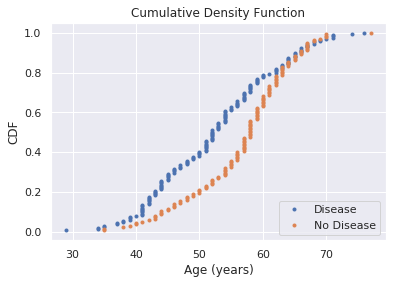

In [5]:
#Unpack ecdf for plotting:
x,y = ecdf(age_arr)
x_nd,y_nd = ecdf(age_nd_arr)

#Plot:
sns.set()
_ = plt.plot(x,y,marker='.',linestyle='none')
_ = plt.plot(x_nd,y_nd,marker='.',linestyle='none')
_ = plt.xlabel('Age (years)')
_ = plt.ylabel('CDF')
_ = plt.title('Cumulative Density Function')

_ = plt.legend(['Disease','No Disease'],loc='lower right')

#We know as sample size n = 165 >30 by central limit theorem we can approx normal

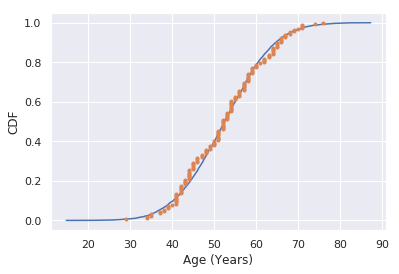

In [6]:
#Focus on fitting a distribution to the ages with disease:
#Normal:
mu = np.mean(df_heart)
sigma = np.std(df_heart)
sample = np.random.normal(mu,sigma,size=10000)
x_theo,y_theo = ecdf(sample)
#Plot sample against actual results to compare:
_ = plt.plot(x_theo,y_theo)
_ = plt.plot(x,y,marker='.',linestyle='none')
_ = plt.xlabel('Age (Years)')
_ = plt.ylabel('CDF')

#Fairly normal:

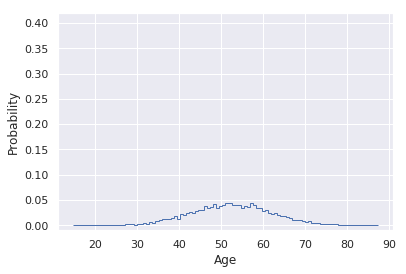

In [7]:
#Plotting the bell curve:
_ = plt.hist(sample,bins=100,density=True,histtype='step')
_ = plt.xlabel('Age')
_ = plt.ylabel('Probability')
_ = plt.ylim(-0.01, 0.42)
plt.show()

In [8]:
#What is the probability of getting a heart attack at age<=30?
age_30 = np.sum(sample < 30)
age_30
#77 people out of 10000 is quite small:
print('The probability of someone getting heart disease under 30 is {}'.format(age_30/len(sample)))

The probability of someone getting heart disease under 30 is 0.0085


In [9]:
# Now onto the predictive model:
lr = LogisticRegression(solver='saga',max_iter=10000)

#X_1 = features, y_1 = target:
X_1 = df.drop(columns='target',axis=1)
y_1 = df.target

#Train vs Test split:
X_train,X_test,y_train,y_test = train_test_split(X_1,y_1,test_size=0.3,random_state=42)

In [10]:
#Setup a hyperparameter grid to train C (the hyperparameter of LogReg)
#Grid of values using np.logspace:
#logspace is usually in base 10 (powers of 10) and are evenly divided between start & stop:
c_space = np.logspace(-5,8,)

#Parameter grid:
param_grid = {'C': c_space}

In [11]:
#Using GridsearchCV: Find the best possible value for C (hyper parameter)
logreg_cv = GridSearchCV(lr,param_grid,cv=5)

In [12]:
#Fit logreg_cv onto training data to find best hyper parameter C:
logreg_cv.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.00000e-05, 1.84207e-05, 3.39322e-05, 6.25055e-05, 1.15140e-04,
       2.12095e-04, 3.90694e-04, 7.19686e-04, 1.32571e-03, 2.44205e-03,
       4.49843e-03, 8.28643e-03, 1.52642e-02, 2.81177e-02, 5.17947e-02,
       9.54095e-02, 1.75751e-01, 3.23746e-01, 5.96362e-01, 1.09854e... 2.55955e+06, 4.71487e+06,
       8.68511e+06, 1.59986e+07, 2.94705e+07, 5.42868e+07, 1.00000e+08])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [13]:
#Print the tuned parameters and score:
best_param_c = logreg_cv.best_params_
print(best_param_c)

#Gives you R^2 with the associated best hyperparameter C
best_score = logreg_cv.best_score_
print(best_score)

{'C': 0.5963623316594648}
0.8113207547169812


In [14]:
#Predict based on new hyperparameter C = 0.59636
y_pred = logreg_cv.predict(X_test)

In [15]:
#Now to test the robustness of model use ROC:
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(conf_matrix,index=['0 True','1 True'], columns=['0 pred','1 pred'])
conf_matrix

,0 pred,1 pred
0 True,34,7
1 True,5,45


In [16]:
#Now looks at the classification report: Inspecting Recall and Precision
class_report = classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        41
           1       0.87      0.90      0.88        50

   micro avg       0.87      0.87      0.87        91
   macro avg       0.87      0.86      0.87        91
weighted avg       0.87      0.87      0.87        91



In [17]:
#ROC curve:
#Grab probabilities of datapoint predicting positive
y_pred_prob = logreg_cv.predict_proba(X_test)[:,1]

#Unpack fpr,tpr,threshold from roc_curve:
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob)

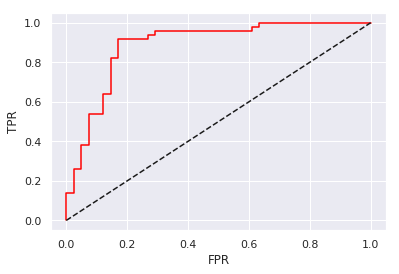

In [18]:
#Plot ROC:
_ = plt.plot(fpr,tpr,color='red')
_ = plt.plot([0,1],[0,1],'k--')
_ = plt.xlabel('FPR')
_ = plt.ylabel('TPR')

plt.show()
#Model does a good job of observing true positives 

In [19]:
#Now looking at area under the curve to get a single statistic:
area = roc_auc_score(y_test,y_pred_prob)
print('The area under the ROC is {}'.format(area))

The area under the ROC is 0.8878048780487805
